In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# read meteorite landing data
os.chdir('..')
meteor_df = pd.read_csv('Data Manipulation in Python Crash Course/P87-S3-Visual-Exploration-Resources/meteorite-landings.csv')
meteor_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [2]:
meteor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [3]:
# drop NA for "reclong" and "reclat"
meteor_df.dropna(subset=['reclong', 'reclat'], inplace=True)
# drop rows with "reclong" more than 300
meteor_df = meteor_df[meteor_df.reclong < 300]
# display info
meteor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38400 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38400 non-null  object 
 1   id           38400 non-null  int64  
 2   nametype     38400 non-null  object 
 3   recclass     38400 non-null  object 
 4   mass         38282 non-null  float64
 5   fall         38400 non-null  object 
 6   year         38225 non-null  float64
 7   reclat       38400 non-null  float64
 8   reclong      38400 non-null  float64
 9   GeoLocation  38400 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


## 2D Histogram

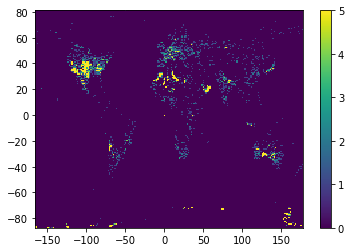

In [4]:
# plot hist2d of "reclong" and "reclat" on matplotlib
plt.hist2d(meteor_df.reclong, meteor_df.reclat, bins=200, vmax=5)
# plt.xlabel('reclong')
# plt.ylabel('reclat')
plt.colorbar()
plt.show();



## 2D Hex Plots

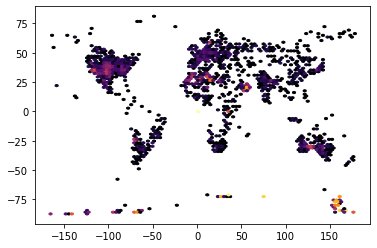

In [5]:
# plot 2D hexbin of "reclong" and "reclat" on matplotlib
plt.hexbin(meteor_df.reclong, meteor_df.reclat, bins='log', cmap='inferno')

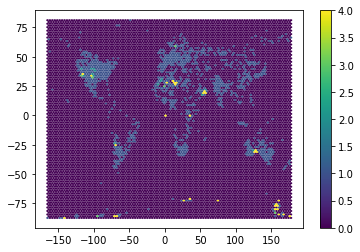

In [6]:
# plot 2D hexbin of "reclong" and "reclat" on matplotlib
plt.hexbin(meteor_df.reclong, meteor_df.reclat, bins=200, vmax=4, linewidths=0.0)
plt.colorbar();

<AxesSubplot:xlabel='reclong', ylabel='reclat'>

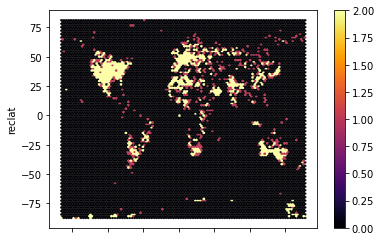

In [7]:
# 2D hexbin of "reclong" and "reclat" on pandas
meteor_df.plot.hexbin(x='reclong', y='reclat', gridsize=100, cmap='inferno', linewidths=0.25, vmax=2)

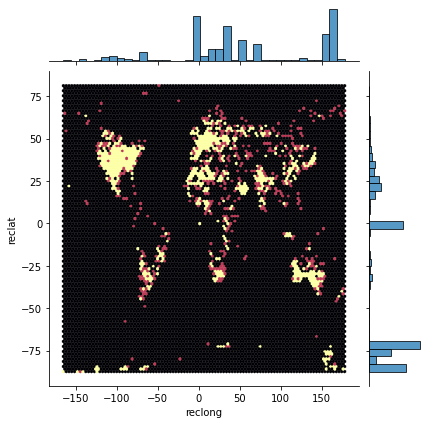

In [21]:
# 2D hexbin of "reclong" and "reclat" on seaborn
sns.jointplot(x='reclong', y='reclat', data=meteor_df, 
    kind='hex', gridsize=100, cmap='inferno', linewidth=0.25, vmax=2);

# save figure
plt.savefig('Saved Plots/meteorite_landings_2D_jointplot.pdf', bbox_inches='tight')


## Contour
It's easier to show these plots using data with broader shapes, so let's make some.

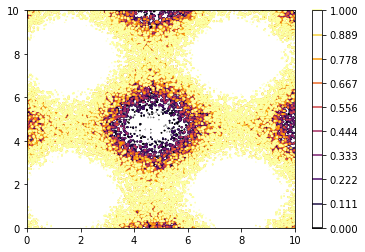

In [9]:
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.sin(Y) + 2 * np.random.rand(200, 200))

# Plot contour
plt.contour(X, Y, Z, levels=np.linspace(0, 1, 10), cmap='inferno')
plt.colorbar();

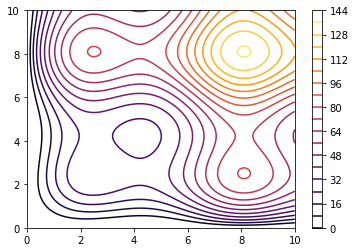

In [10]:
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.sin(Y) + 2 * np.arcsinh(X*Y))**2

# Plot contour
plt.contour(X, Y, Z, levels=20, cmap='inferno')
plt.colorbar();

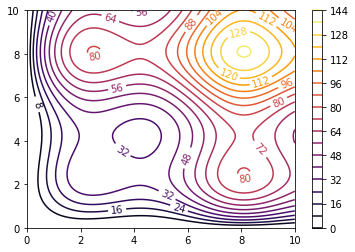

In [11]:
c = plt.contour(X, Y, Z, levels=20, cmap='inferno')
plt.clabel(c, inline=True, fontsize=10)
plt.colorbar();

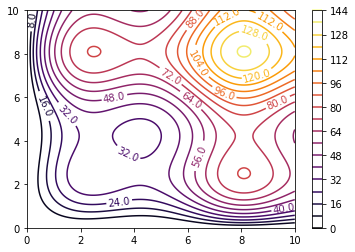

In [12]:
c = plt.contour(X, Y, Z, levels=20, cmap='inferno')
plt.clabel(c, inline=True, fmt='%0.1f')
plt.colorbar();

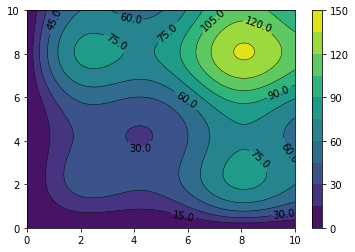

In [13]:
# combine contour and contour fill
c = plt.contour(X, Y, Z, levels=10, colors='k', linewidths=0.5)
plt.clabel(c, inline=True, fmt='%0.1f')
plt.contourf(X, Y, Z, levels=10)
plt.colorbar();

## KDE
To look at KDE, let me quickly draw some samples from the above surface

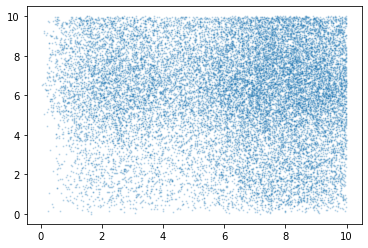

In [14]:
# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

/home/datascience/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


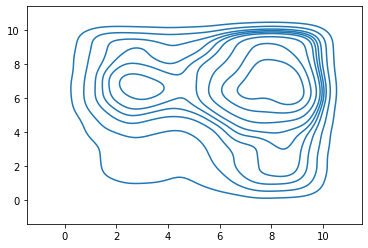

In [15]:
# plot kde in seaborn
sns.kdeplot(xs, ys);

## Jointplots
Joint plots allow you to swap out the interior and marginal plots to get something that perfectly suits your needs

/home/datascience/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


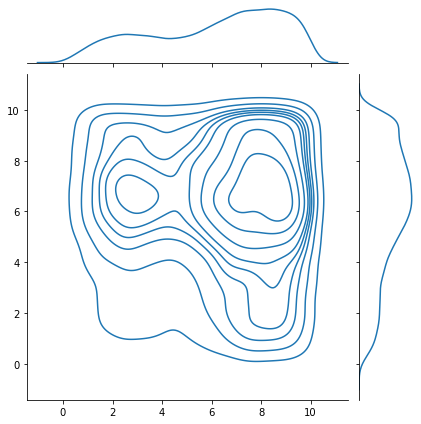

In [16]:
# plot a jointplot in seaborn
sns.jointplot(xs, ys, kind='kde');

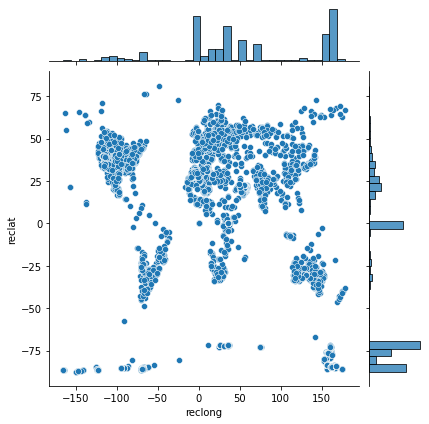

In [17]:
sns.jointplot(data=meteor_df, x="reclong", y="reclat");

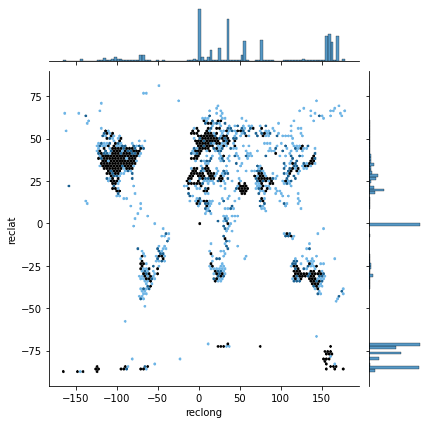

In [22]:
sns.jointplot(data=meteor_df, x="reclong", y="reclat", kind="hex", 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

# save the plot
plt.savefig('Saved Plots/meteorite_landings_2D_jointplot2.pdf',
    bbox_inches="tight")

In [19]:
# pairplot in seaborn
# sns.pairplot(data=meteor_df[["reclat", "reclong", "mass"]]); # not working-taking too long